# Multilabel classification
- `PCA`와 `CCA`에서 찾은 두 개의 주성분으로 투영 후, 선형 커널이 있는 두 개의 `SVC`를 사용해 각 클래스에 대한 판별 모델을 학습하는 `OneVsRestClassifier`를 사용해 수행

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [2]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # 분리된 hyperplane 얻기
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # 문장이 충분히 긴지 확인
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

In [3]:
def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel="linear"))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c="gray", edgecolors=(0, 0, 0))
    plt.scatter(
        X[zero_class, 0],
        X[zero_class, 1],
        s=160,
        edgecolors="b",
        facecolors="none",
        linewidths=2,
        label="Class 1",
    )
    plt.scatter(
        X[one_class, 0],
        X[one_class, 1],
        s=80,
        edgecolors="orange",
        facecolors="none",
        linewidths=2,
        label="Class 2",
    )

    plot_hyperplane(
        classif.estimators_[0], min_x, max_x, "k--", "Boundary\nfor class 1"
    )
    plot_hyperplane(
        classif.estimators_[1], min_x, max_x, "k-.", "Boundary\nfor class 2"
    )
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - 0.5 * max_x, max_x + 0.5 * max_x)
    plt.ylim(min_y - 0.5 * max_y, max_y + 0.5 * max_y)
    if subplot == 2:
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.legend(loc="upper left")

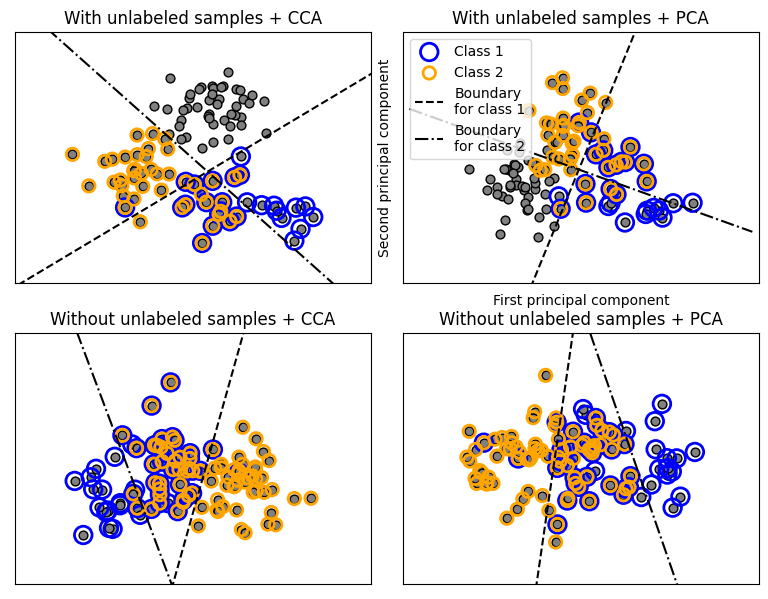

In [4]:
plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=True, random_state=1
)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=False, random_state=1
)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(0.04, 0.02, 0.97, 0.94, 0.09, 0.2)
plt.show()